<a href="https://colab.research.google.com/github/ghanbarzadeh/Course_MachineVision_2021/blob/master/CHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
|!wget https://web.stanford.edu/class/cs315b/images/gates.png

--2021-10-17 08:48:56--  https://web.stanford.edu/class/cs315b/images/gates.png
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144491 (141K) [image/png]
Saving to: ‘gates.png’

gates.png           100%[===================>] 141.10K   497KB/s    in 0.3s    

2021-10-17 08:48:56 (497 KB/s) - ‘gates.png’ saved [144491/144491]



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

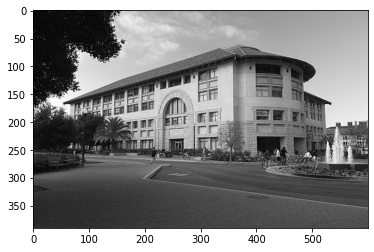

In [ ]:
img = cv2.imread('/content/gates.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

# Smoothing

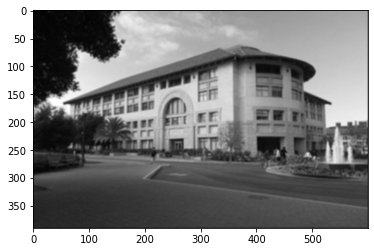

True

In [ ]:
def smooth_image(image):
    h, w = image.shape
    new_image = np.zeros((h, w))
    # Padding
    padded_image = np.zeros((h+4, w+4))
    padded_image[2:-2,2:-2] = image[:,:]
    kernel = np.array([[2, 4, 5, 4, 2], 
                       [4, 9, 12 ,9, 4], 
                       [5, 12, 15, 12, 5], 
                       [4, 9, 12, 9, 4], 
                       [2, 4, 5, 4, 2]]) / 159.0
    for x in range(h):
        for y in range(w):
            new_image[x, y] = np.sum(padded_image[x:x+5, y:y+5] * kernel)
    return new_image

smoothed_image = smooth_image(img)

plt.imshow(smoothed_image, cmap="gray")
plt.show()

cv2.imwrite("smoothed_image.png", smoothed_image)

# Gradient Calculation

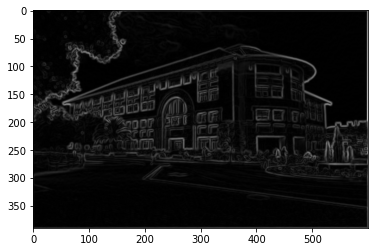

True

In [ ]:
def calc_gradient(image):
    h, w = image.shape
    new_image = np.zeros((h, w))
    # Padding
    padded_image = np.zeros((h+2, w+2))
    padded_image[1:-1,1:-1] = image[:,:]
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    Gy_kernel = np.array([[-1, -2, -1], 
                          [0, 0, 0], 
                          [1, 2, 1]])
    for x in range(h):
        for y in range(w):
            Gx = np.sum(padded_image[x:x+3, y:y+3] * Gx_kernel)
            Gy = np.sum(padded_image[x:x+3, y:y+3] * Gy_kernel)
            new_image[x, y] = np.sqrt(Gx**2 + Gy**2)
    return new_image

image_gradient = calc_gradient(smoothed_image)

plt.imshow(image_gradient, cmap="gray")
plt.show()

cv2.imwrite("image_gradient.png", image_gradient)

[[ 45.  90.  90. ...  90.  90. 135.]
 [  0.  45.  90. ...  90. 135. 180.]
 [  0.   0.  45. ... 135. 180. 180.]
 ...
 [  0.   0. 315. ... 225. 180. 180.]
 [  0. 315. 270. ... 270. 225. 180.]
 [315. 270. 270. ... 270. 270. 225.]]


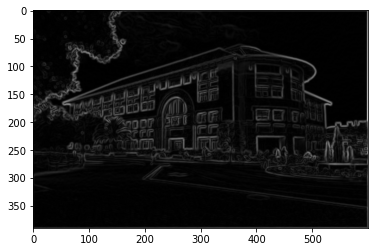

True

In [53]:
def NMS(image):
    h, w = image.shape
    gradient_magnitude = np.zeros((h, w))
    gradient_dir = np.zeros((h, w))
    NMS_image = np.zeros((h, w))
    # Padding
    padded_image = np.zeros((h+2, w+2))
    padded_image[1:-1,1:-1] = image[:,:]
    Gx_kernel = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    Gy_kernel = np.array([[-1, -2, -1], 
                          [0, 0, 0], 
                          [1, 2, 1]])
    for x in range(h):
        for y in range(w):
            Gx = np.sum(padded_image[x:x+3, y:y+3] * Gx_kernel)
            Gy = np.sum(padded_image[x:x+3, y:y+3] * Gy_kernel)
            gradient_magnitude[x, y] = np.sqrt(Gx**2 + Gy**2)
            gradient_dir[x, y] = np.arctan2(Gy, Gx) * 180 / np.pi
    # Round gradient directions to nearest 45 degree 
    gradient_dir = np.mod(np.round(gradient_dir / 45) * 45, 360)
    # Pad the gradient magnitude to accompany edge cases
    padded_gradient = np.zeros((h+2, w+2))
    padded_gradient[1:-1,1:-1] = gradient_magnitude[:,:]
    # NMS
    for x in range(h):
        for y in range(w):
            if gradient_dir == 45 or gradient_dir == 225:
                
    print(gradient_dir)
    return gradient_magnitude

image_NMS = NMS(smoothed_image)

plt.imshow(image_NMS, cmap="gray")
plt.show()

cv2.imwrite("image_NMS.png", image_NMS)

True